# 공격력/마력 확률 문제

> "작성 완료"

- toc: true
- branch: master
- badges: true
- comments: true
- author: 한재수
- categories: [Statistics, Python]

## 문제 설정

`-` 공격력 직업으로 공격력 2줄 옵션(12% / 9%)을 획득할 때까지 에디셔널 잠재 능력을 재설정하는 상황을 가정하자

`-` 옵션을 재설정하다보면 공격력 2줄이 등장하기 전에 마력 2줄이 등장하는 경우를 쉽게 볼 수 있다

`-` 누군가는 공격력 직업으로 옵션을 재설정할 경우 공격력보다 마력이 등장할 확률이 더 높다고 체감할 수 있다

`-` 여기서 가설은 `공격력 직업으로 옵션을 재설정할 경우 공격력 2줄보다 마력 2줄이 등장할 확률이 더 높다` 이다

`-` 이것이 진짜인지 확인하는 방법은 간단한데 공격력 직업으로 에디셔널 잠재 능력을 수많이 재설정하면 된다

`-` 이를 혼자 진행하는 것은 어려우니 여러 명에게 데이터를 받아 진행할 수도 있다

`-` 만약, 데이터를 받을 사람을 미리 무작위로 정하는 것이 아닌 아무나에게 데이터를 받는다면 해당 데이터가 편향될 가능성이 높다

`-` 대개, 데이터를 제출하는 사람은 해당 가설이 참이라고 느낀 사람이 많을 것이다

`-` 반대로 공격력 2줄 옵션을 마력 2줄 옵션보다 먼저 획득한 사람은 해당 가설이 거짓이라고 생각하며 굳이 데이터를 제출하진 않을 것이다 (가설이 거짓임을 체감했기 때문)

`-` 그러면 수집된 데이터에는 마력 2줄 옵션이 공격력 2줄보다 많이 포함되고 이는 가설이 참이라는 결론을 도출하게 된다

`-` 무작위로 수집된 데이터라면 공격력 2줄이 등장할 확률과 마력 2줄이 등장할 확률은 같다

`-` 이에 대해 보충 설명을 하면 다음과 같다

`-` $n$명의 사람들에 대해 공격력 2줄 옵션이 나올 때까지 큐브를 사용한다고 가정하자

`-` 이 중 평균적으로 $\frac{n}{2}$명은 공격력 2줄 옵션이 먼저 나왔을 것이며 나머지 $\frac{n}{2}$명은 마력 2줄 옵션이 먼저 나왔을 것이다

`-` 여기서, `공격력 등장 횟수 = 마력 등장 횟수 = n / 2`이다

`-` 마력 2줄 옵션이 먼저 나온 $\frac{n}{2}$명은 공격력 2줄 옵션을 얻을 때까지 큐브를 사용한다

`-` 그러면 $\frac{n}{2}$명 중 평균적으로 $\frac{n}{4}$명은 공격력 2줄 옵션이 먼저 나왔을 것이며 나머지 $\frac{n}{4}$명은 마력 2줄 옵션이 먼저 나왔을 것이다

`-` 여기서, `공격력 등장 횟수 = 마력 등장 횟수 = n / 4`이다

`-` 이를 반복하면 $n$명의 사람들이 큐브를 사용해서 얻은 잠재능력 중 공격력 2줄 옵션이 등장한 횟수의 기댓값은 $\frac{n}{2} + \frac{n}{4} + \cdots = n$ 이며 마력도 동일하다

`-` 그런데 공격력 2줄 옵션 또는 마력 2줄 옵션을 확인하는 것이 아니라 첫 번째줄 옵션이 공격력인지 마력인지 확인하는 경우는 어떨까?

`-` 마력 2줄이 많이 등장했더라도 첫 번째줄 옵션만 놓고보면 공격력이 마력보다 많이 등장했을 수도 있다

`-` 하지만, 마력 2줄이 많이 등장했다는 것은 해당 수치만큼 첫 번째 줄 옵션에서 마력이 등장했다는 것을 의미한다

`-` 즉, 첫 번째 줄 옵션에서 마력이 어느정도 등장했음을 보장하므로 첫 번째 줄에서 공격력보다 마력이 평균적으로 많이 등장했을 것이다  

`-` 궁금증: `마력 2줄을 여러 번 획득한 후 공격력 2줄을 획득했을 때 첫 번째 줄 옵션은 마력이 공격력보다 많이 획득되도록 편향되었을까?`

> Note: 첫 번째 줄에서 공격력이 등장할 확률 = 마력이 등장할 확률 = $4.878\%$

> Note: 두 번째 줄에서 공격력이 등장할 확률 = 마력이 등장할 확률 = $6.2791\%$

> Note: 세 번째 줄에서 공격력이 등장할 확률 = 마력이 등장할 확률 = $6.907\%$

In [75]:
#collapse
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm


class AdditionalCube:
    def __init__(self):
        self.first_option2prob = {"공격력": 0.04878, "마력": 0.04878, "잡옵": 1 - 0.04878 * 2}
        self.second_option2prob = {"공격력": 0.062791, "마력": 0.062791, "잡옵": 1 - 0.062791 * 2}
        self.third_option2prob = {"공격력": 0.06907, "마력": 0.06907, "잡옵": 1 - 0.06907 * 2}

    def roll(self):
        return (
            self._get_random_option(self.first_option2prob),
            self._get_random_option(self.second_option2prob),
            self._get_random_option(self.third_option2prob),
        )

    def _get_random_option(self, option2prob):
        rand = np.random.rand()
        cumulative_prob = 0.0
        for option, prob in option2prob.items():
            cumulative_prob += prob
            if rand <= cumulative_prob:
                return option


class CubeResultAnalyzer:
    def is_attack_power(self, option):
        return option == "공격력"

    def is_magic_power(self, option):
        return option == "마력"

    def is_valid_attack_power(self, first, second, third):
        return self.is_attack_power(first) and (self.is_attack_power(second) or self.is_attack_power(third))

    def is_valid_magic_power(self, first, second, third):
        return self.is_magic_power(first) and (self.is_magic_power(second) or self.is_magic_power(third))


class History:
    def __init__(self):
        self.data = []

    def record(self, data: dict):
        self.data.append(data)

    def reset(self):
        self.data.clear

    def to_pandas(self):
        return pd.DataFrame.from_records(self.data)


class CubeSimulator:
    def __init__(self, cube, threshold=3):
        self.cube = cube
        self.threshold = threshold
        self.analyzer = CubeResultAnalyzer()
        self.history = History()

    def reset(self):
        self.history.reset()
        self._reset_init_conditions()

    def _reset_init_conditions(self):
        self.n = 0
        self.attack_power_count = 0
        self.valid_attack_power_count = 0
        self.magic_power_count = 0
        self.valid_magic_power_count = 0

    def simulate_once(self):
        first, second, third = self.cube.roll()
        self.n += 1
        if self.analyzer.is_valid_attack_power(first, second, third):
            self.valid_attack_power_count += 1
        elif self.analyzer.is_valid_magic_power(first, second, third):
            self.valid_magic_power_count += 1
        if self.analyzer.is_attack_power(first):
            self.attack_power_count += 1
        elif self.analyzer.is_magic_power(first):
            self.magic_power_count += 1

    def simulate_until_attack2(self):
        while self.valid_attack_power_count == 0:
            self.simulate_once()

    def simulate(self, size):
        for _ in tqdm(range(size)):
            self._reset_init_conditions()
            self.simulate_until_attack2()
            data = {
                "n": self.n,
                "attack_power_count": self.attack_power_count,
                "magic_power_count": self.magic_power_count,
                "valid_magic_power_count": self.valid_magic_power_count,
            }
            self.history.record(data)

In [86]:
np.random.seed(2024)

In [87]:
cube = AdditionalCube()
simulator = CubeSimulator(cube)

In [88]:
size = 50000
simulator.simulate(size)

100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:39<00:00, 1259.10it/s]


In [96]:
df = simulator.history.to_pandas()

In [97]:
df.head()

,n,attack_power_count,magic_power_count,valid_magic_power_count
0,148,5,7,1
1,333,12,15,1
2,11,1,0,0
3,305,15,14,2
4,50,1,4,0


## 억까당한 경우

In [98]:
# 궁금증: 억까당하고 에디 공격력 2줄을 뽑았을 때 첫 줄 옵션에서 공격력보다 마력이 더 많이 등장했을까?
df_over_magic3 = df.query("valid_magic_power_count >= 3")

In [99]:
df_over_magic3.head()

,n,attack_power_count,magic_power_count,valid_magic_power_count
5,358,19,18,4
21,425,18,22,5
27,308,12,15,3
71,122,3,5,3
77,424,22,24,3


`-` 마력 2줄을 3번 이상 획득한 후에 공격력 2줄을 획득한 경우 억까당했다고 볼 수 있을 것이다

- 억까당하고 공격력 2줄을 뽑기위해 시도한 횟수

In [100]:
ns = df_over_magic3["n"].to_list()

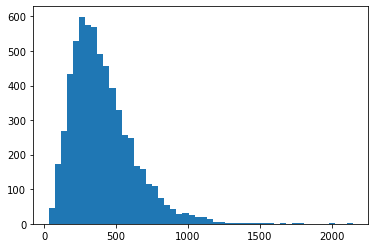

In [101]:
plt.hist(ns, bins=50)
plt.show()

In [102]:
print(sum(ns))
print(min(ns))
print(max(ns))

2529798
29
2148


- 억까당하고 공격력 2줄을 뽑았을 때 첫 줄 옵션에서 공격력보다 마력이 더 많이 등장했을까?

In [103]:
attack_power_counts = df_over_magic3["attack_power_count"].to_numpy() 
magic_power_counts = df_over_magic3["magic_power_count"].to_numpy() 

In [104]:
attack_power_counts[:10], magic_power_counts[:10]

(array([19, 18, 12,  3, 22, 13,  6,  4, 23, 24], dtype=int64),
 array([18, 22, 15,  5, 24,  8, 14,  7, 25, 32], dtype=int64))

In [105]:
gaps = magic_power_counts - attack_power_counts

In [106]:
print(len(gaps))

6256


In [107]:
gaps[:10]

array([-1,  4,  3,  2,  2, -5,  8,  3,  2,  8], dtype=int64)

In [108]:
sum(gaps)

18989

`-` 에디 마력 2줄을 3번 이상 획득한 후 공격력 2줄을 획득한 사람은 50000명 중 6256명이다

`-` 이 6256명의 경우 총 2529798번 잠재능력을 재설정 했으며 첫 번째 줄에서 마력이 공격력보다 18989번 더 등장했다

`-` 이 수치가 일반적인 경우와 비교했을 때 이상치인지 확인하겠다

## 일반적인 경우

In [109]:
# 궁금증: 일반적인 상황에선 에디 공격력 2줄을 뽑았을 때 첫 줄 옵션에서 공격력보다 마력이 더 많이 등장했을까?
ns = df["n"].to_list()

- 공격력 2줄을 뽑기위해 시도한 횟수

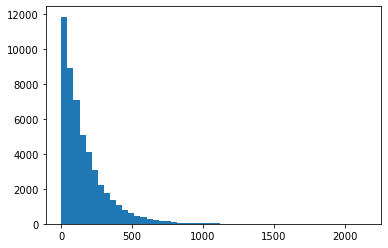

In [110]:
plt.hist(ns, bins=50)
plt.show()

In [111]:
print(sum(ns))
print(min(ns))
print(max(ns))

8046085
1
2148


- 일반적인 상황에선 공격력 2줄을 뽑았을 때 첫 줄 옵션에서 공격력보다 마력이 더 많이 등장했을까?

In [94]:
attack_power_counts = df["attack_power_count"].to_numpy() 
magic_power_counts = df["magic_power_count"].to_numpy() 
gaps = magic_power_counts - attack_power_counts
print(len(gaps))

50000


In [95]:
sum(gaps)

147

`-` 공격력 2줄을 뽑았을 때 첫 번째 줄에서 마력보다 공격력이 323번 더 등장했다

`-` 50000명이 총 8046085번 잠재능력을 재설정 했으며 첫 번째 줄에서 마력이 공격력보다 147번 더 등장했다

`-` 첫 번째 줄에서 공격력, 마력이 각각 등장할 확률 $p= 0.04878$이다

`-` $n=8046085$이므로 이항분포 $B(8046085, 0.04878)$를 생각할 수 있다

`-` 이는 한 번의 시행마다 공격력을 얻을 확률이 $0.04878$인 잠재능력 재설정을 8046085번 했을 때 등장한 공격력 옵션의 개수임을 뜻한다 (마력도 동일함)

`-` 그런데 표본을 수집할 때 $n=8046085$을 처음부터 정한 것은 아니며 여기서 $n$은 확률 변수의 실현치이다 (공격력 2줄을 50000번 얻을때까지 잠재능력 재설정을 한 횟수)

`-` 왜냐하면 8046085번 잠재능력을 설정한게 아니라 50000명의 사람들이 각각 공격력 2줄이 나올때까지 잠재능력을 재설정한 결과를 취합한 것이기 때문이다

`-` 항상 잠재능력 재설정의 마지막 결과는 공격력 2줄(공격력 1줄은 당연히 포함)이므로 여기서 첫 번째 줄에서 공격력이 등장한 횟수의 분포는 정확하게 이항 분포를 따르지는 않는다

`-` 하지만 표본 크기가 8046085로 매우 크므로 이항 분포로 근사 가능하다

`-` 공격력 2줄을 50000번 얻을 때까지 잠재능력 재설정을 하여 총 8046085번 잠재능력을 재설정 했을 때 첫 번째 줄에서 공격력이 등장한 횟수를 $X$라 하자

`-` 확률 변수 $X$는 근사적으로 이항 분포 $B(8046085, 0.04878)$를 따르며 마력의 경우도 이와 동일하며 확률 변수 $Y$라 칭하자 

`-` $np=8046085\times0.04878=392488$로 충분히 크므로 확률 변수 $X$와 $Y$는 $N(np, np(1-p))$로 근사 가능하다

`-` 이때 확률 변수 $W=Y-X$는 정규분포의 성질에 의해 $N(0, 2np(1-p))$를 따른다

`-` 정규분포에서 $95\%$의 데이터는 $(\mu-2\sigma, \mu+2\sigma)$에 존재하는데 이를 계산하면 $(-1771, 1771)$이다

`-` 즉, 147이란 값은 충분히 등장할 수 있는 수치이다

`-` 위에서는 $n$도 2529798로 더 작으며 확률 변수 실현치인 18989도 $(-1771, 1771)$ 구간을 벗어났으니 편향된 값이라 볼 수 있다

`-` 결론: 억까인 상황에 대해서는 첫 줄에 마력이 공격력보다 더 많이 등장한다

## 최소한의 억까?

`-` 한편, 억까의 기준이 너무 높다고 생각할 수 있다

`-` 위에서 정한 억까의 기준은 에디 마력 2줄을 3번 이상 획득한 후 공격력 2줄을 획득한 경우이다

`-` 억까의 기준을 가장 약하게 정한다면 `에디 마력 2줄을 단 1번` 획득한 후 공격력 2줄을 획득한 경우로 정의할 수 있다

In [116]:
# 궁금증: 최소한의 억까를 당하고 에디 공격력 2줄을 뽑았을 때 첫 줄 옵션에서 공격력보다 마력이 더 많이 등장했을까?
df_magic1 = df.query("valid_magic_power_count == 1")

In [118]:
ns = df_magic1["n"].to_list()

In [119]:
print(sum(ns))
print(min(ns))
print(max(ns))

2015066
3
1030


In [120]:
attack_power_counts = df_magic1["attack_power_count"].to_numpy() 
magic_power_counts = df_magic1["magic_power_count"].to_numpy() 
gaps = magic_power_counts - attack_power_counts

In [121]:
print(len(gaps))

12561


In [122]:
sum(gaps)

372

`-` 에디 마력 2줄을 단 1번 획득한 후 공격력 2줄을 획득한 사람은 50000명 중 12561명이다

`-` 이 12561명의 경우 총 2015066번 잠재능력을 재설정 했으며 첫 번째 줄에서 마력이 공격력보다 372번 더 등장했다

`-` 위에서 계산한 것과 동일하게 해보면 $95\%$의 데이터는 $(-864, 864)$에 존재한다

`-` 이는 일반적인 기준과 비교했을 때 이상치로 취급되지 않는다

`-` 따라서 일반적인 경우에서 샘플링한 것인지 에디 마력 2줄을 1번 획득한 후 공격력 2줄을 획득한 사람을 대상으로 샘플링한 것인지 구분할 수 없다

`-` 생각해보면 당연한게 마력 2줄을 1번 획득했고 공격력 2줄도 동일하게 1번 획득했다

`-` 즉, 둘의 비율이 $1:1$이다

`-` 일반적인 경우도 맨 처음에 계산했듯이 둘의 비율이 $1:1$이다

`-` 그러니 구분하지 못하는게 당연하고 오히려 첫 번째 줄에서 공격력 또는 마력이 나머지에 비해 $431$번 더 등장했다면 문제가 된다

`-` 처음에 설정한 궁금증은 `마력 2줄을 여러 번 획득한 후 공격력 2줄을 획득했을 때 첫 번째 줄 옵션은 마력이 공격력보다 많이 획득되도록 편향되었을까?`였다

`-` 이 궁금증은 `에디 마력 2줄을 단 1번 획득한 후 공격력 2줄을 획득한 사람`을 제외하곤 성립한다